# Análise Estatística - Ginástica Artística Modalidade Geral Paris 2024
Esta análise abrange os dados de ginástica artística para os Jogos Olímpicos de Paris 2024, focando nas pontuações por aparelhos e por atletas femininas, visando identificar padrões e insights relevantes.

## Configuração Inicial
Nesta seção, configuramos o ambiente com as bibliotecas necessárias e preparamos o espaço de trabalho para a análise dos dados.

In [1]:
## Importação de Bibliotecas

In [2]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

## Carregamento e Visualização dos Dados
Carregamos os dados do dataset e apresentamos uma visualização inicial para entender a estrutura e a composição dos dados.

In [3]:
# Inicializar a SparkSession
spark = SparkSession.builder \
    .appName("GinasticaParis") \
    .getOrCreate()


## Passos Realizados

## Análise Descritiva
### Visualizações Iniciais
Foram criadas visualizações de boxplots e histogramas para cada aparelho, com linhas indicativas de média, mediana e moda, oferecendo uma visão detalhada da distribuição das pontuações.

## Análise Avançada
Análises mais complexas foram exploradas para extrair insights adicionais dos dados, aplicando técnicas estatísticas avançadas quando necessário.

## Modelagem Estatística
Foram descritos os modelos estatísticos utilizados para entender melhor os padrões nos dados e fazer previsões ou classificações relevantes.

## Carregamento e Visualização dos Dados

In [4]:
## Importando o DataFrame
path_csv = 'NotasGinasticaArtisticaGeral.csv'
df = spark.read.csv(path_csv, header=True, inferSchema=True)

In [5]:
print(f"O dataframe possui {df.count()} registros")
print(f"Com {len(df.columns)} colunas")

O dataframe possui 96 registros
Com 7 colunas


In [6]:
## Analisando o schema do dataframe
df.printSchema()

root
 |-- Atleta: string (nullable = true)
 |-- Nacionalidade: string (nullable = true)
 |-- Dificuldade: double (nullable = true)
 |-- Execucao: double (nullable = true)
 |-- Penalidade: integer (nullable = true)
 |-- Pontuação: double (nullable = true)
 |-- Aparelho: string (nullable = true)



## Análise Descritiva

### Análises Descritivas Básicas

In [7]:
df.groupBy("Nacionalidade").agg(countDistinct("Atleta").alias("Distinct Athletes")).show()

+-------------+-----------------+
|Nacionalidade|Distinct Athletes|
+-------------+-----------------+
|          BRA|                2|
|          ALG|                1|
|          ITA|                2|
|          GBR|                2|
|          AUS|                1|
|          HUN|                1|
|          POR|                1|
|          NED|                1|
|          USA|                2|
|          GER|                2|
|          CAN|                2|
|          COL|                1|
|          ROU|                2|
|          CHN|                2|
|          JPN|                2|
+-------------+-----------------+



In [35]:
# Conversão do Dataframe pyspark para o Dataframe pandas
df_pandas = df.toPandas()

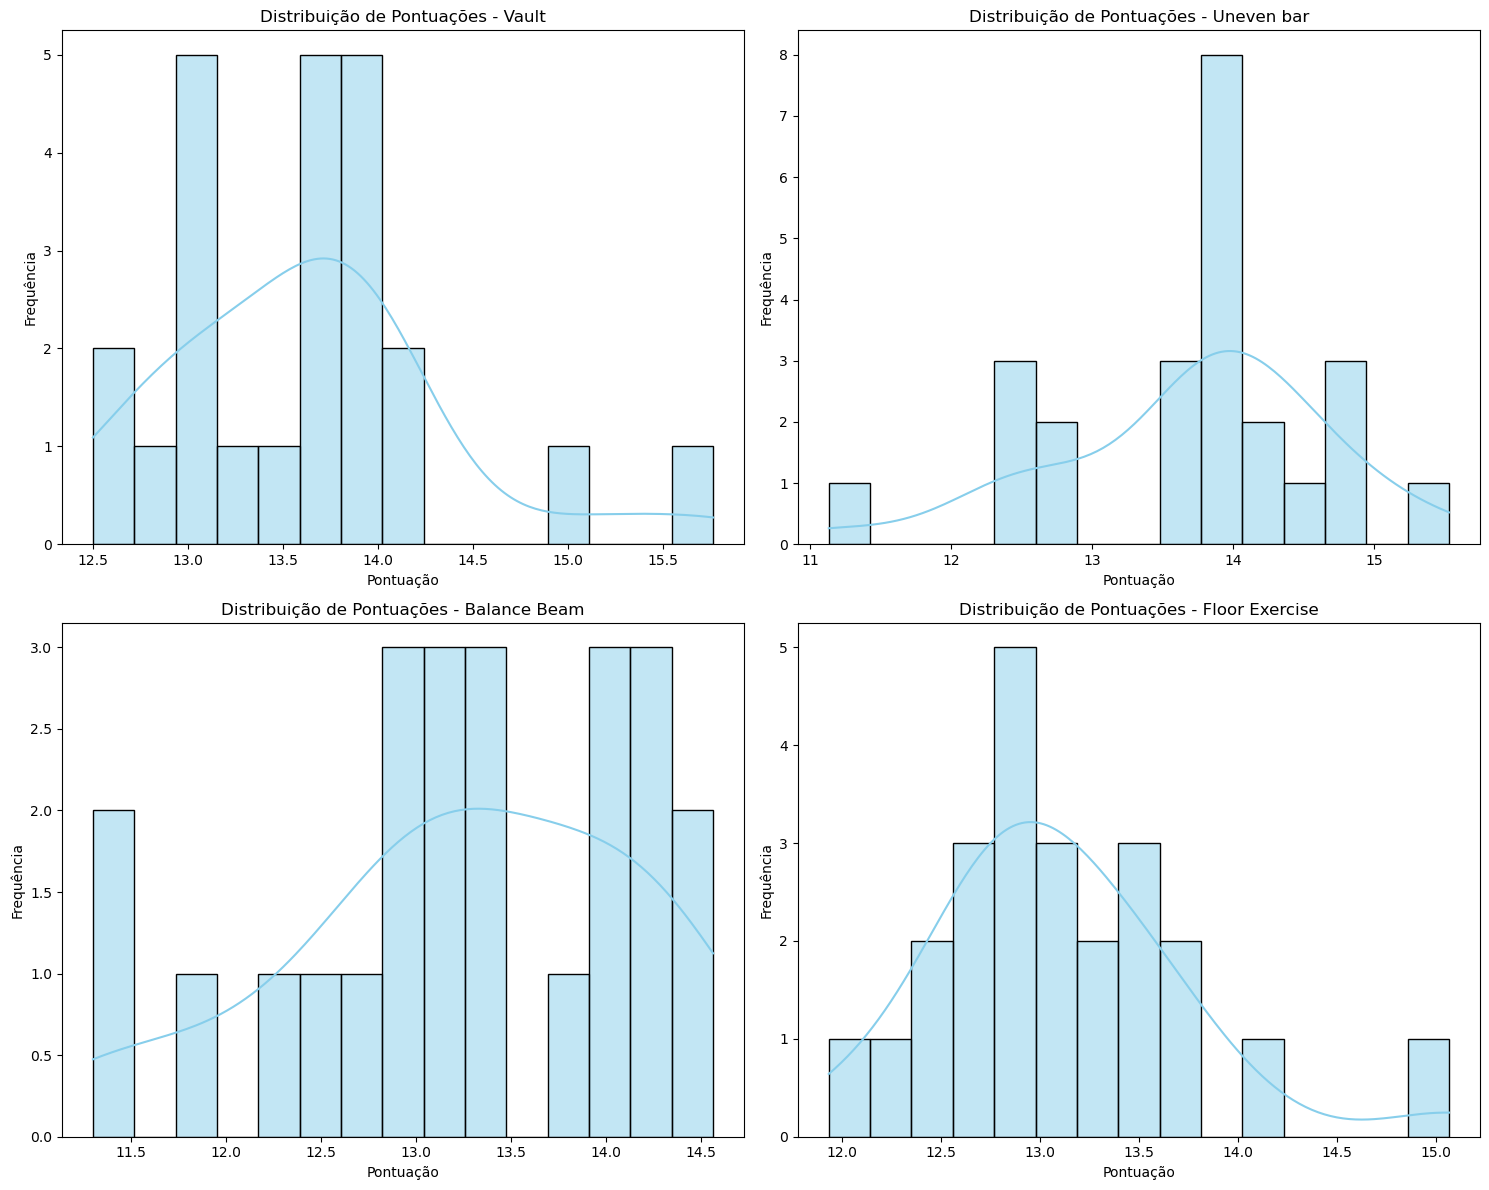

In [8]:
# Criação de histogramas de pontuação para cada aparelho
aparelhos = df_pandas['Aparelho'].unique()
plt.figure(figsize=(15, 12))

for i, aparelho in enumerate(aparelhos, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df_pandas[df_pandas['Aparelho'] == aparelho]['Pontuação'], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribuição de Pontuações - {aparelho}')
    plt.xlabel('Pontuação')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

## Análise Avançada

## Modelagem Estatística

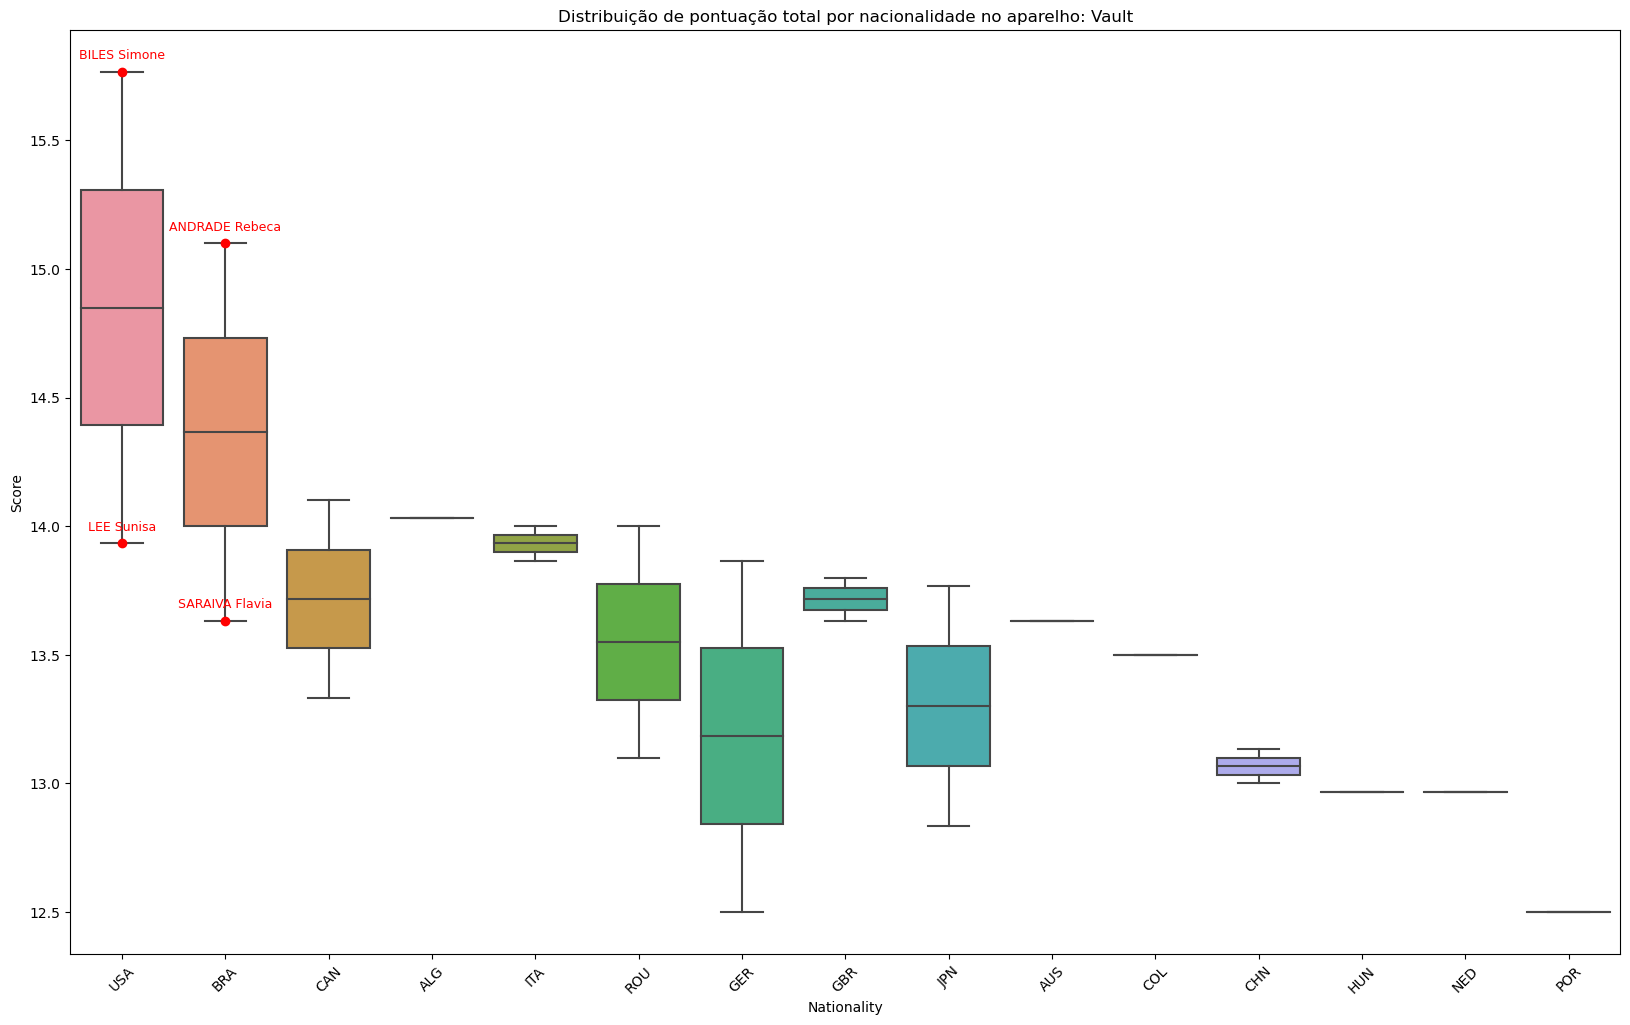

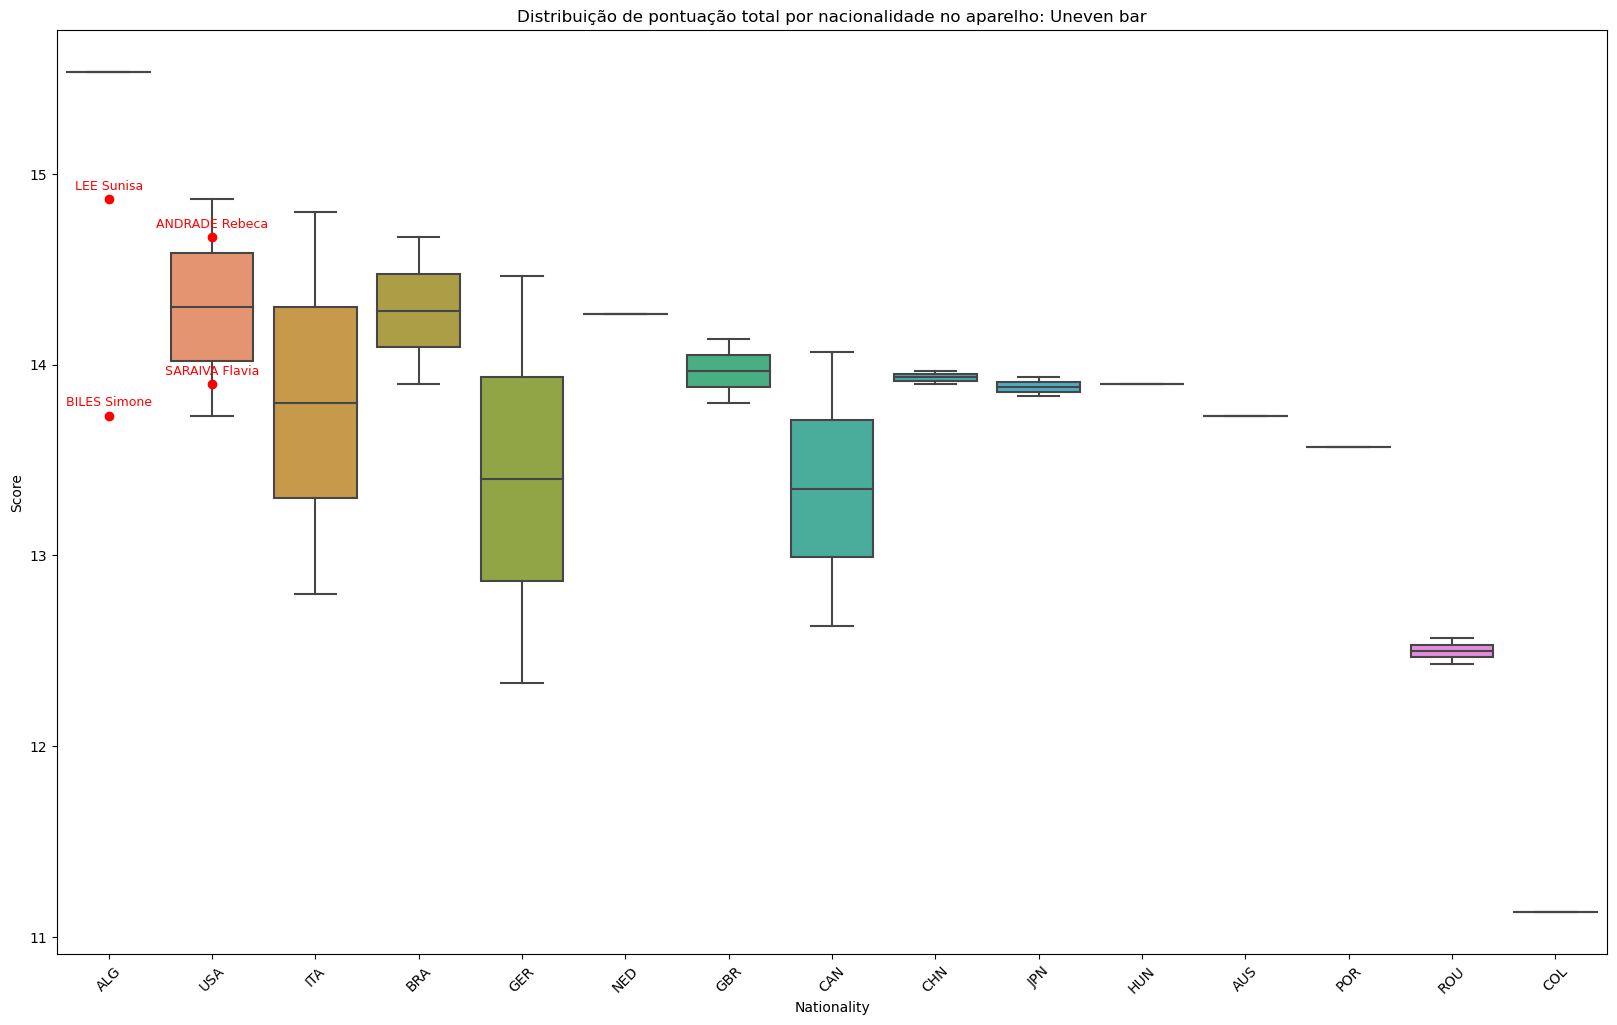

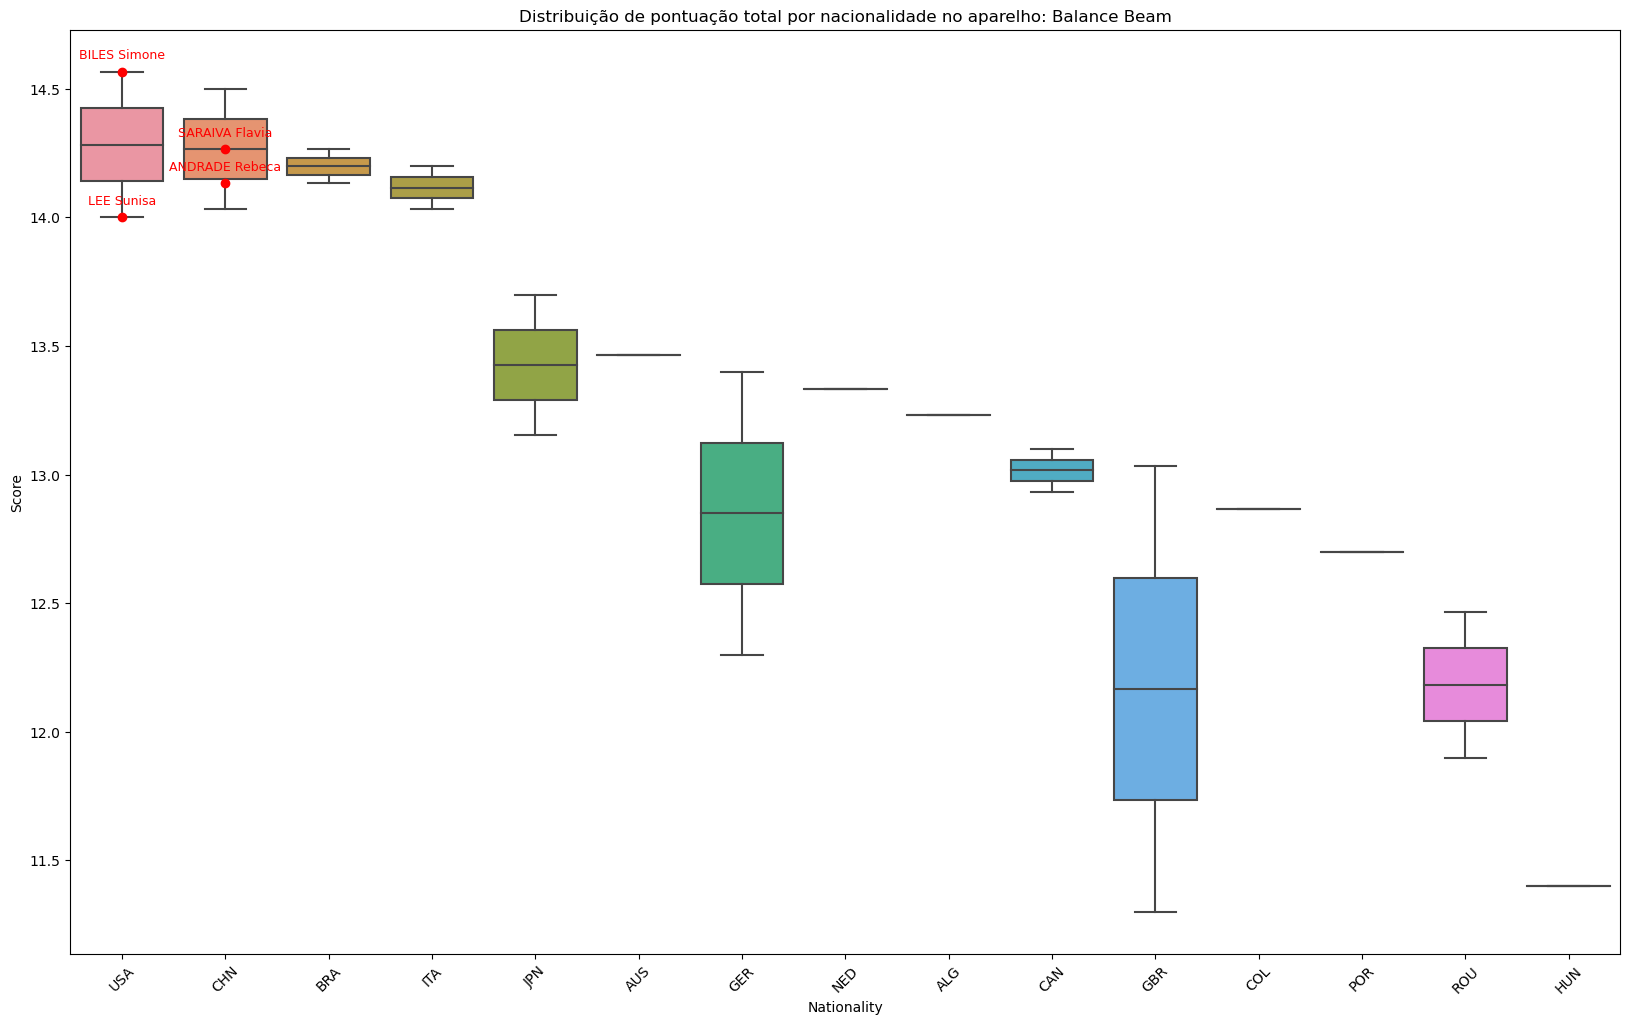

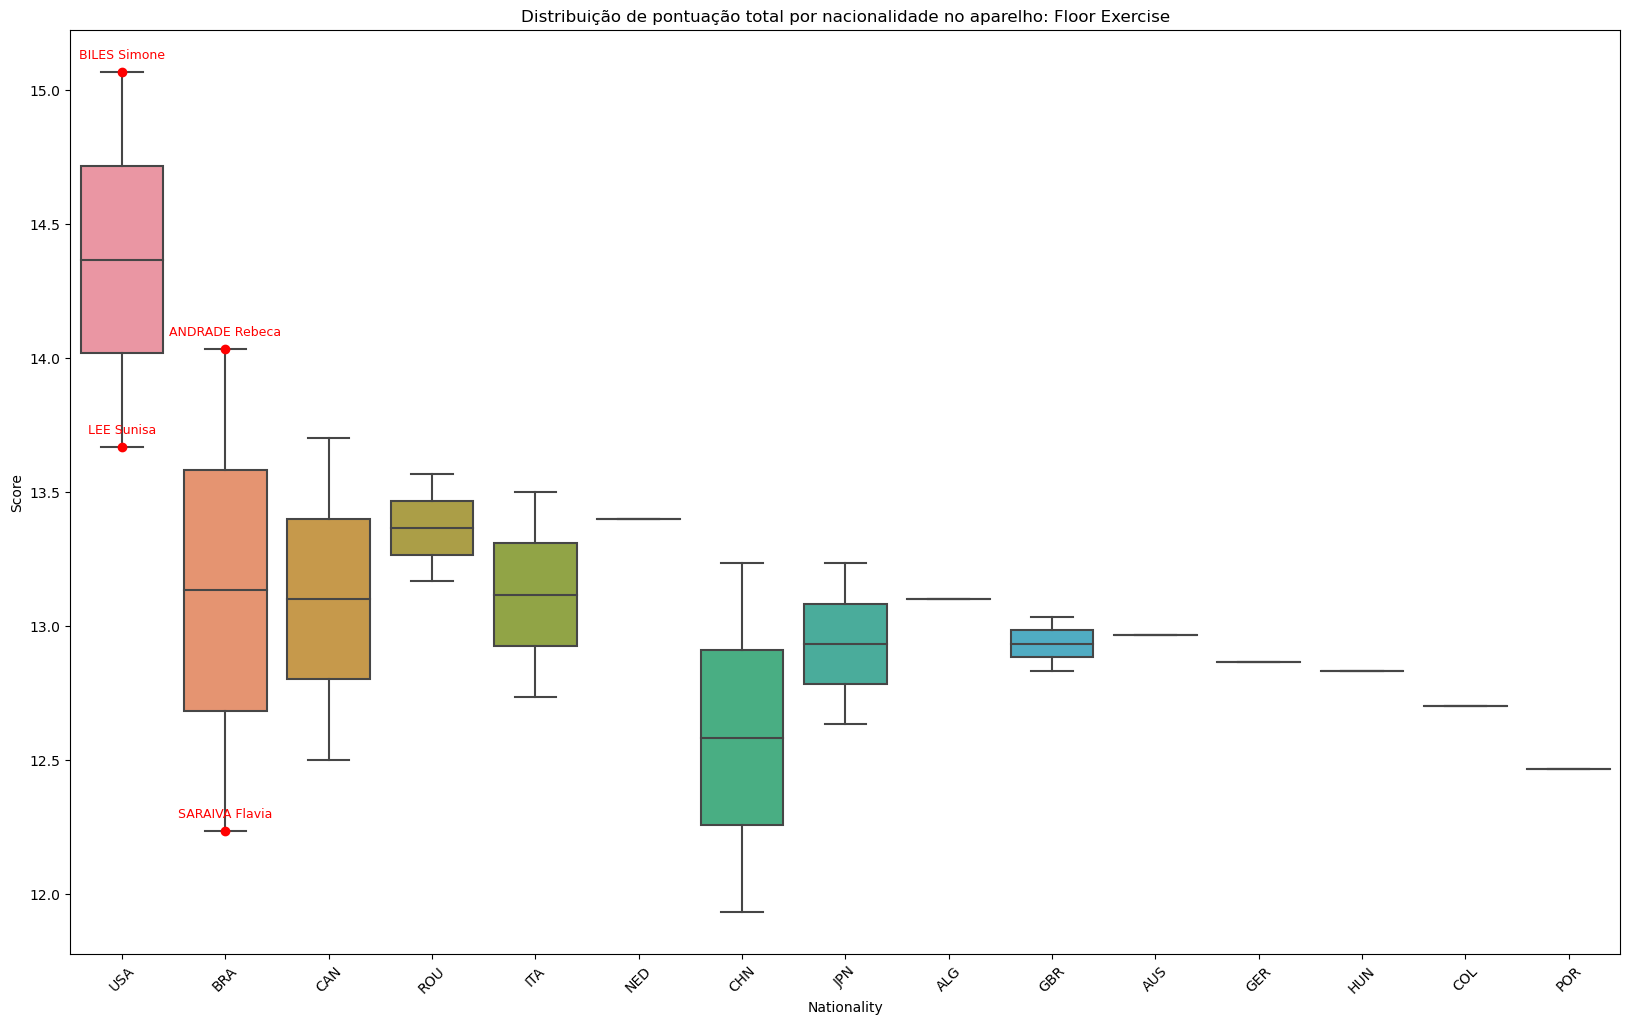

In [43]:
apparatus_list = df_pandas['Aparelho'].unique()

# Plotagem do gráfico de distribuição
for apparatus in apparatus_list:
    plt.figure(figsize=(20, 12))
    sns.boxplot(x='Nacionalidade', y='Pontuação', data=df_pandas[df_pandas['Aparelho'] == apparatus])
    
    # Highlight specific athletes
    athletes_to_annotate = ["BILES Simone", "ANDRADE Rebeca", "SARAIVA Flavia", "LEE Sunisa"]
    for athlete in athletes_to_annotate:
        athlete_data = df_pandas[(df_pandas['Atleta'] == athlete) & (df_pandas['Aparelho'] == apparatus)]
        for index, row in athlete_data.iterrows():
            plt.scatter(row['Nacionalidade'], row['Pontuação'], color='red', zorder=5)
            plt.text(row['Nacionalidade'], row['Pontuação'] + 0.05, row['Atleta'], 
                     horizontalalignment='center', color='red', fontsize=9)

    plt.title(f'Distribuição de pontuação total por nacionalidade no aparelho: {apparatus}')
    plt.xticks(rotation=45)
    plt.xlabel('Nationality')
    plt.ylabel('Score')
    plt.show()

Descriptive Statistics by Apparatus:
                count       mean       std     min       25%      50%   
Aparelho                                                                
Balance Beam     24.0  13.250583  0.915338  11.300  12.82450  13.2830  \
Floor Exercise   24.0  13.094083  0.645550  11.933  12.72475  12.9995   
Uneven bar       24.0  13.706583  0.970900  11.133  13.37450  13.9000   
Vault            24.0  13.623333  0.743984  12.500  13.07500  13.6330   

                     75%     max  
Aparelho                          
Balance Beam    14.03300  14.566  
Floor Exercise  13.42500  15.066  
Uneven bar      14.16625  15.533  
Vault           13.94975  15.766  


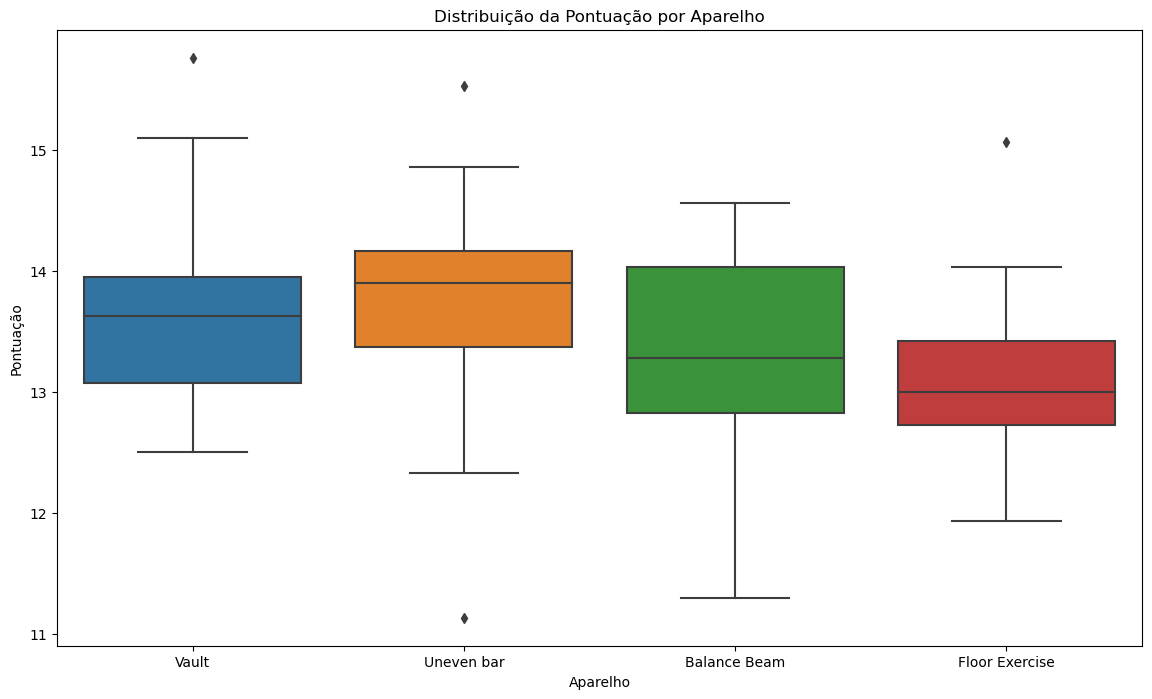

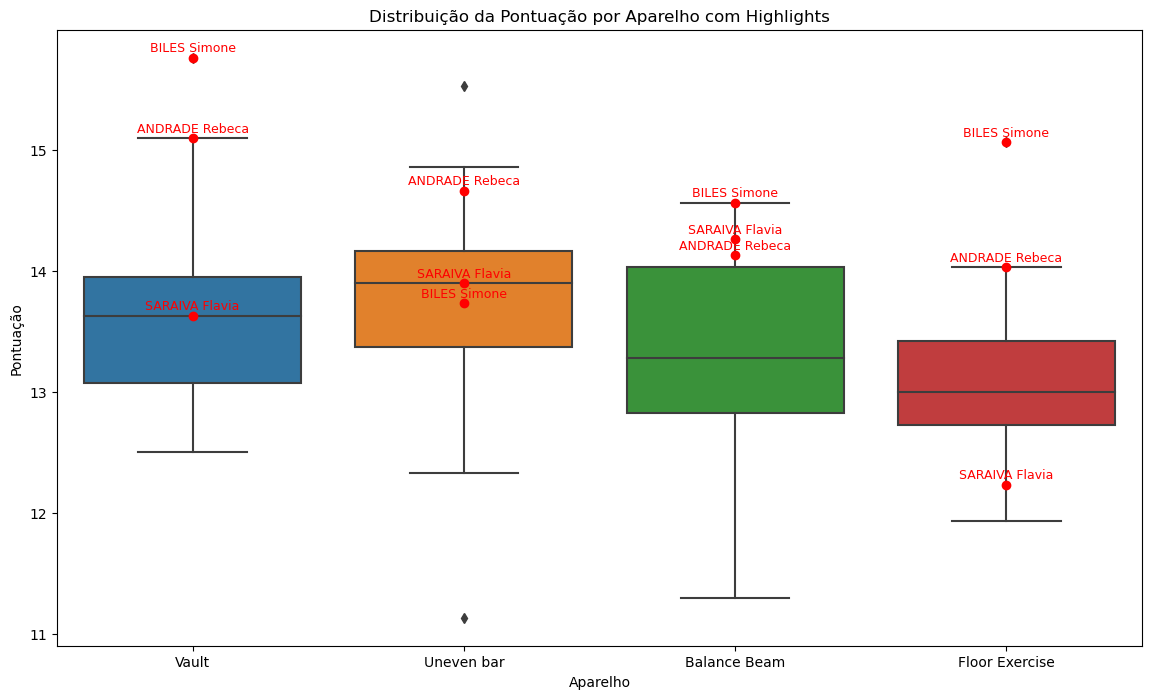

In [15]:
apparatus_stats = df_pandas.groupby('Aparelho')['Pontuação'].describe()
print("Descriptive Statistics by Apparatus:")
print(apparatus_stats)

plt.figure(figsize=(14, 8))
sns.boxplot(x='Aparelho', y='Pontuação', data=df_pandas)
plt.title('Distribuição da Pontuação por Aparelho')
plt.xlabel('Aparelho')
plt.ylabel('Pontuação')
plt.show()

athletes_to_annotate = ["BILES Simone", "ANDRADE Rebeca", "SARAIVA Flavia"]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Aparelho', y='Pontuação', data=df_pandas)

for athlete in athletes_to_annotate:
    athlete_data = df_pandas[df_pandas['Atleta'] == athlete]
    for index, row in athlete_data.iterrows():
        plt.scatter(row['Aparelho'], row['Pontuação'], color='red', zorder=5)
        plt.text(row['Aparelho'], row['Pontuação'] + 0.05, row['Atleta'], 
                 horizontalalignment='center', color='red', fontsize=9)

plt.title('Distribuição da Pontuação por Aparelho com Highlights')
plt.xlabel('Aparelho')
plt.ylabel('Pontuação')
plt.show()

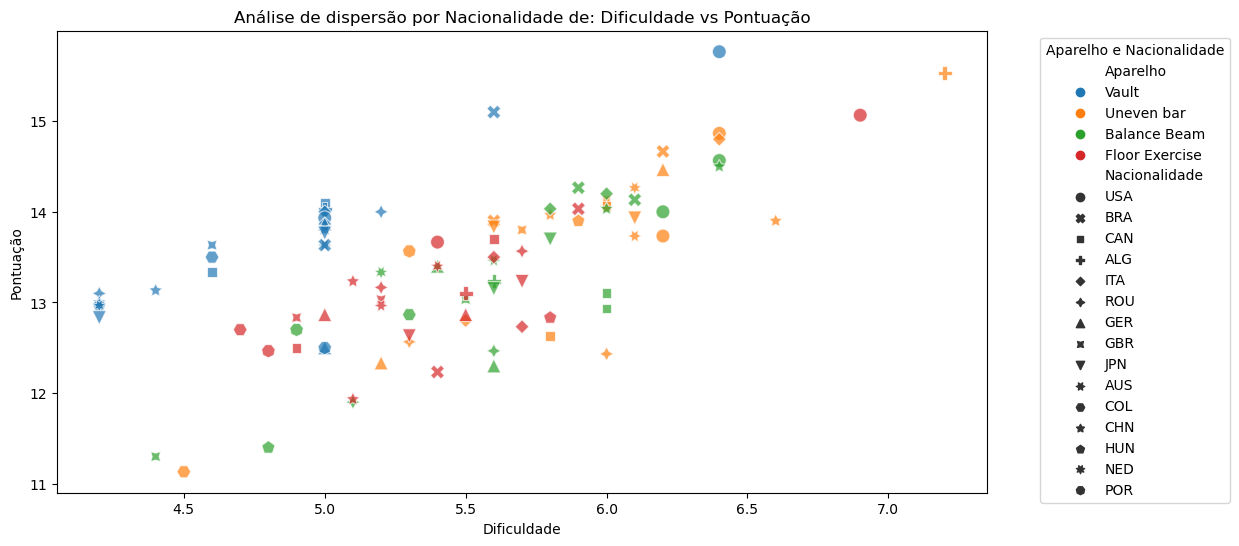

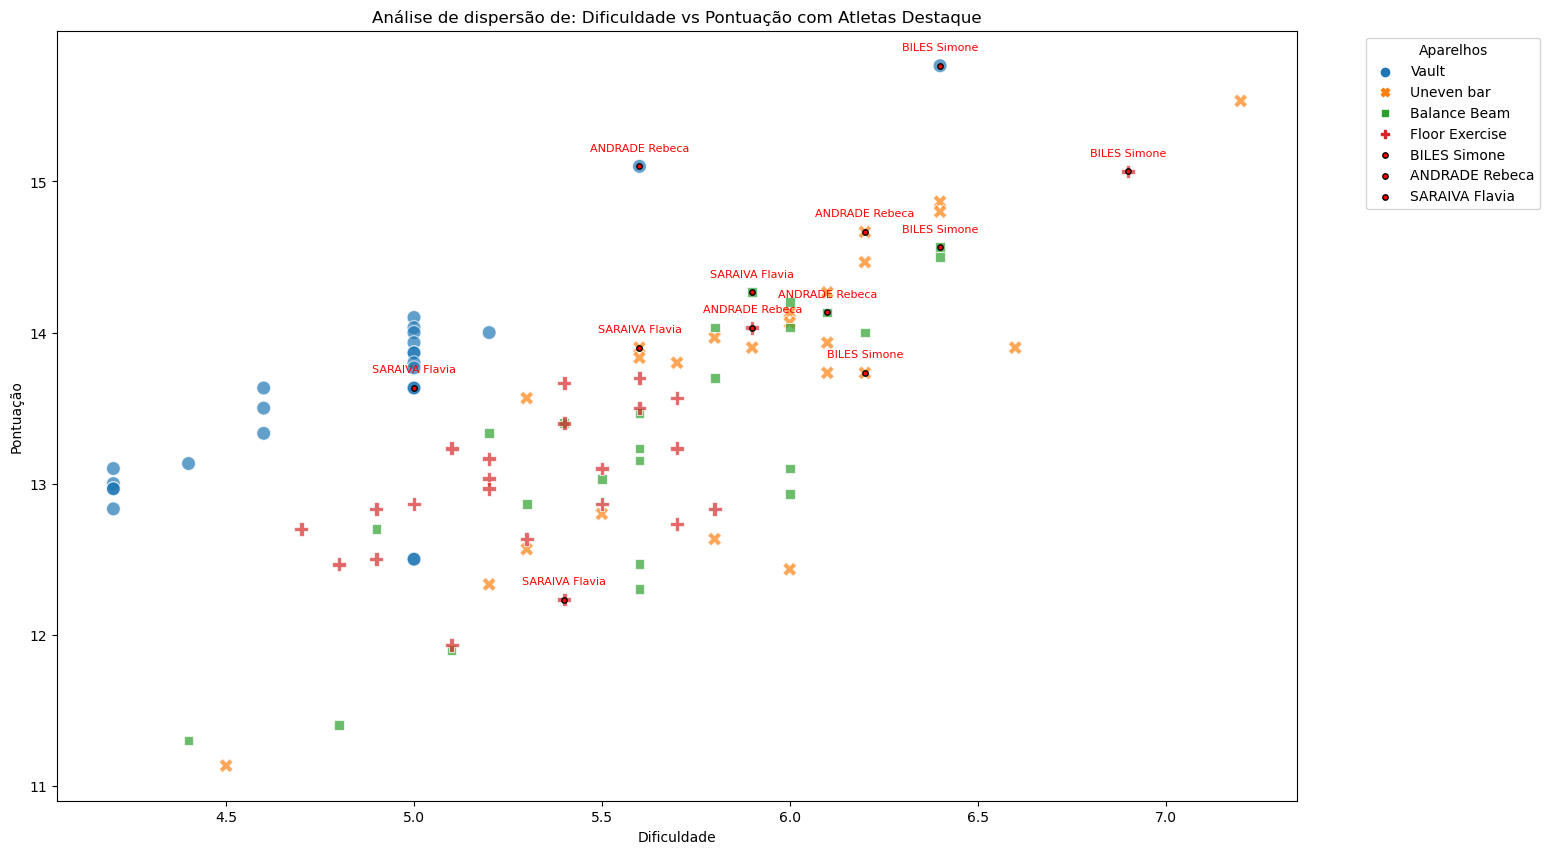

In [44]:
# Criação do gráfico de dispersão para Dificuldade vs Pontuação
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pandas, x='Dificuldade', y='Pontuação', hue='Aparelho', style='Nacionalidade', s=100, alpha=0.7)
plt.title('Análise de dispersão por Nacionalidade de: Dificuldade vs Pontuação')
plt.xlabel('Dificuldade')
plt.ylabel('Pontuação')
plt.legend(title='Aparelho e Nacionalidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Destaque de atletas específicas
athletes_to_highlight = ["BILES Simone", "ANDRADE Rebeca", "SARAIVA Flavia"]

# Plotagem do gráfico
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_pandas, x='Dificuldade', y='Pontuação', hue='Aparelho', style='Aparelho', s=100, alpha=0.7)

for athlete in athletes_to_highlight:
    athlete_data = df_pandas[df_pandas['Atleta'] == athlete]
    plt.scatter(athlete_data['Dificuldade'], athlete_data['Pontuação'], color='red', s=15, edgecolor='black', zorder=5, label=athlete)
    for index, row in athlete_data.iterrows():
        plt.text(row['Dificuldade'], row['Pontuação'] + 0.1, row['Atleta'], horizontalalignment='center', fontsize=8, color='red')

plt.title('Análise de dispersão de: Dificuldade vs Pontuação com Atletas Destaque')
plt.xlabel('Dificuldade')
plt.ylabel('Pontuação')
plt.legend(title='Aparelhos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

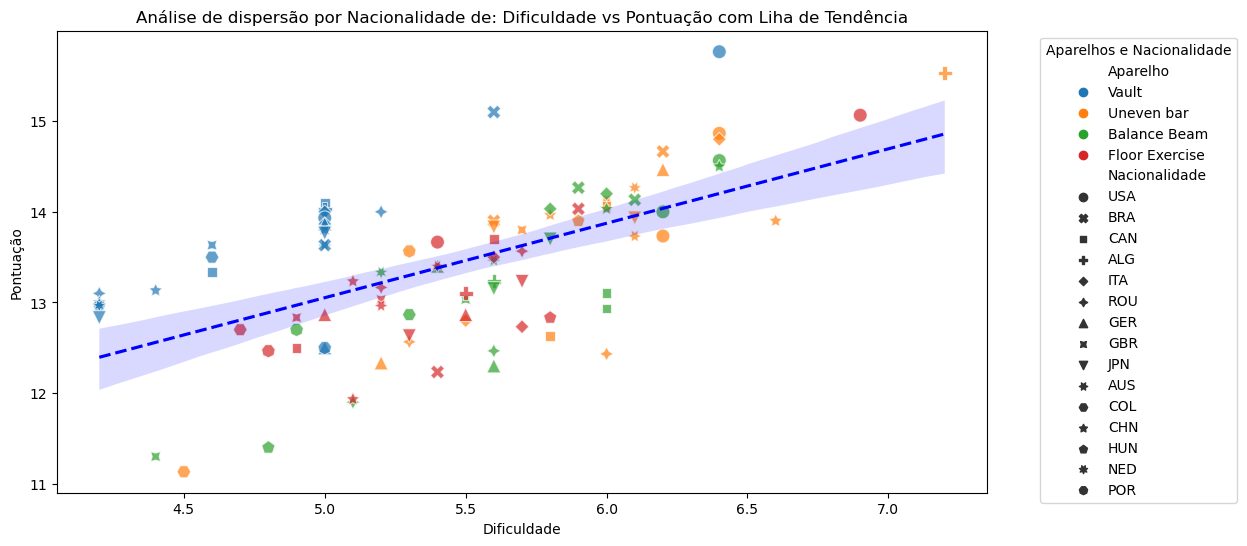

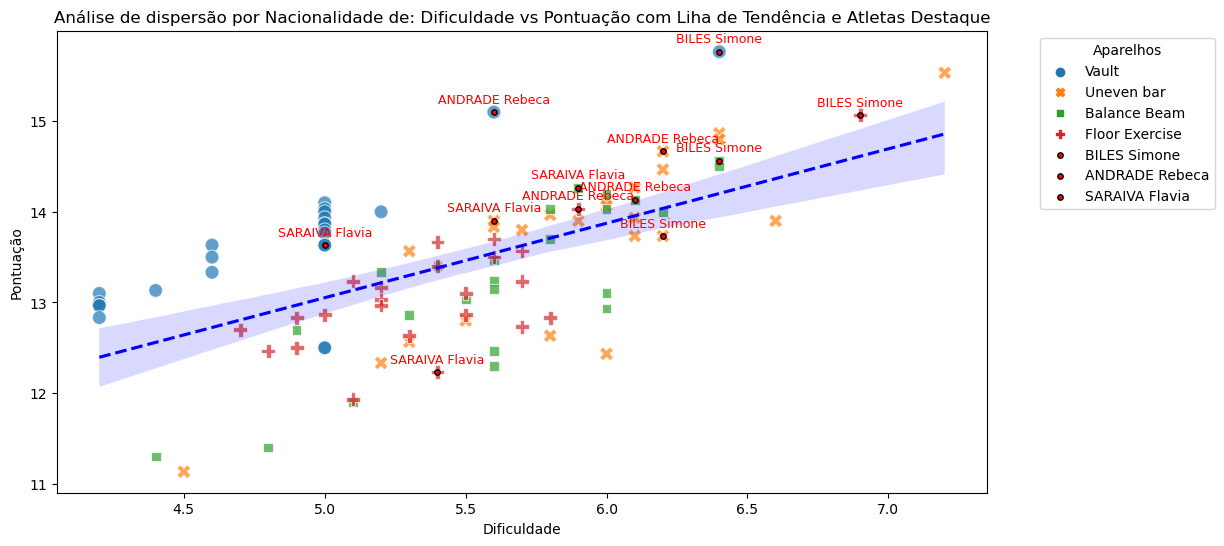

In [45]:
# Crição de um gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pandas, x='Dificuldade', y='Pontuação', hue='Aparelho', style='Nacionalidade', s=100, alpha=0.7)
sns.regplot(data=df_pandas, x='Dificuldade', y='Pontuação', scatter=False, color='blue', line_kws={"linestyle":"--"})
plt.title('Análise de dispersão por Nacionalidade de: Dificuldade vs Pontuação com Liha de Tendência')
plt.xlabel('Dificuldade')
plt.ylabel('Pontuação')
plt.legend(title='Aparelhos e Nacionalidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Destaque de atletas
athletes_to_highlight = ["BILES Simone", "ANDRADE Rebeca", "SARAIVA Flavia"]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pandas, x='Dificuldade', y='Pontuação', hue='Aparelho', style='Aparelho', s=100, alpha=0.7)
sns.regplot(data=df_pandas, x='Dificuldade', y='Pontuação', scatter=False, color='blue', line_kws={"linestyle":"--"})


# Adicionar marcação para atletas específicos
for athlete in athletes_to_highlight:
    athlete_data = df_pandas[df_pandas['Atleta'] == athlete]
    plt.scatter(athlete_data['Dificuldade'], athlete_data['Pontuação'], color='red', s=15, edgecolor='black', zorder=5, label=athlete)
    for index, row in athlete_data.iterrows():
        plt.text(row['Dificuldade'], row['Pontuação'] + 0.1, row['Atleta'], horizontalalignment='center', fontsize=9, color='red')

plt.title('Análise de dispersão por Nacionalidade de: Dificuldade vs Pontuação com Liha de Tendência e Atletas Destaque')
plt.xlabel('Dificuldade')
plt.ylabel('Pontuação')
plt.legend(title='Aparelhos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

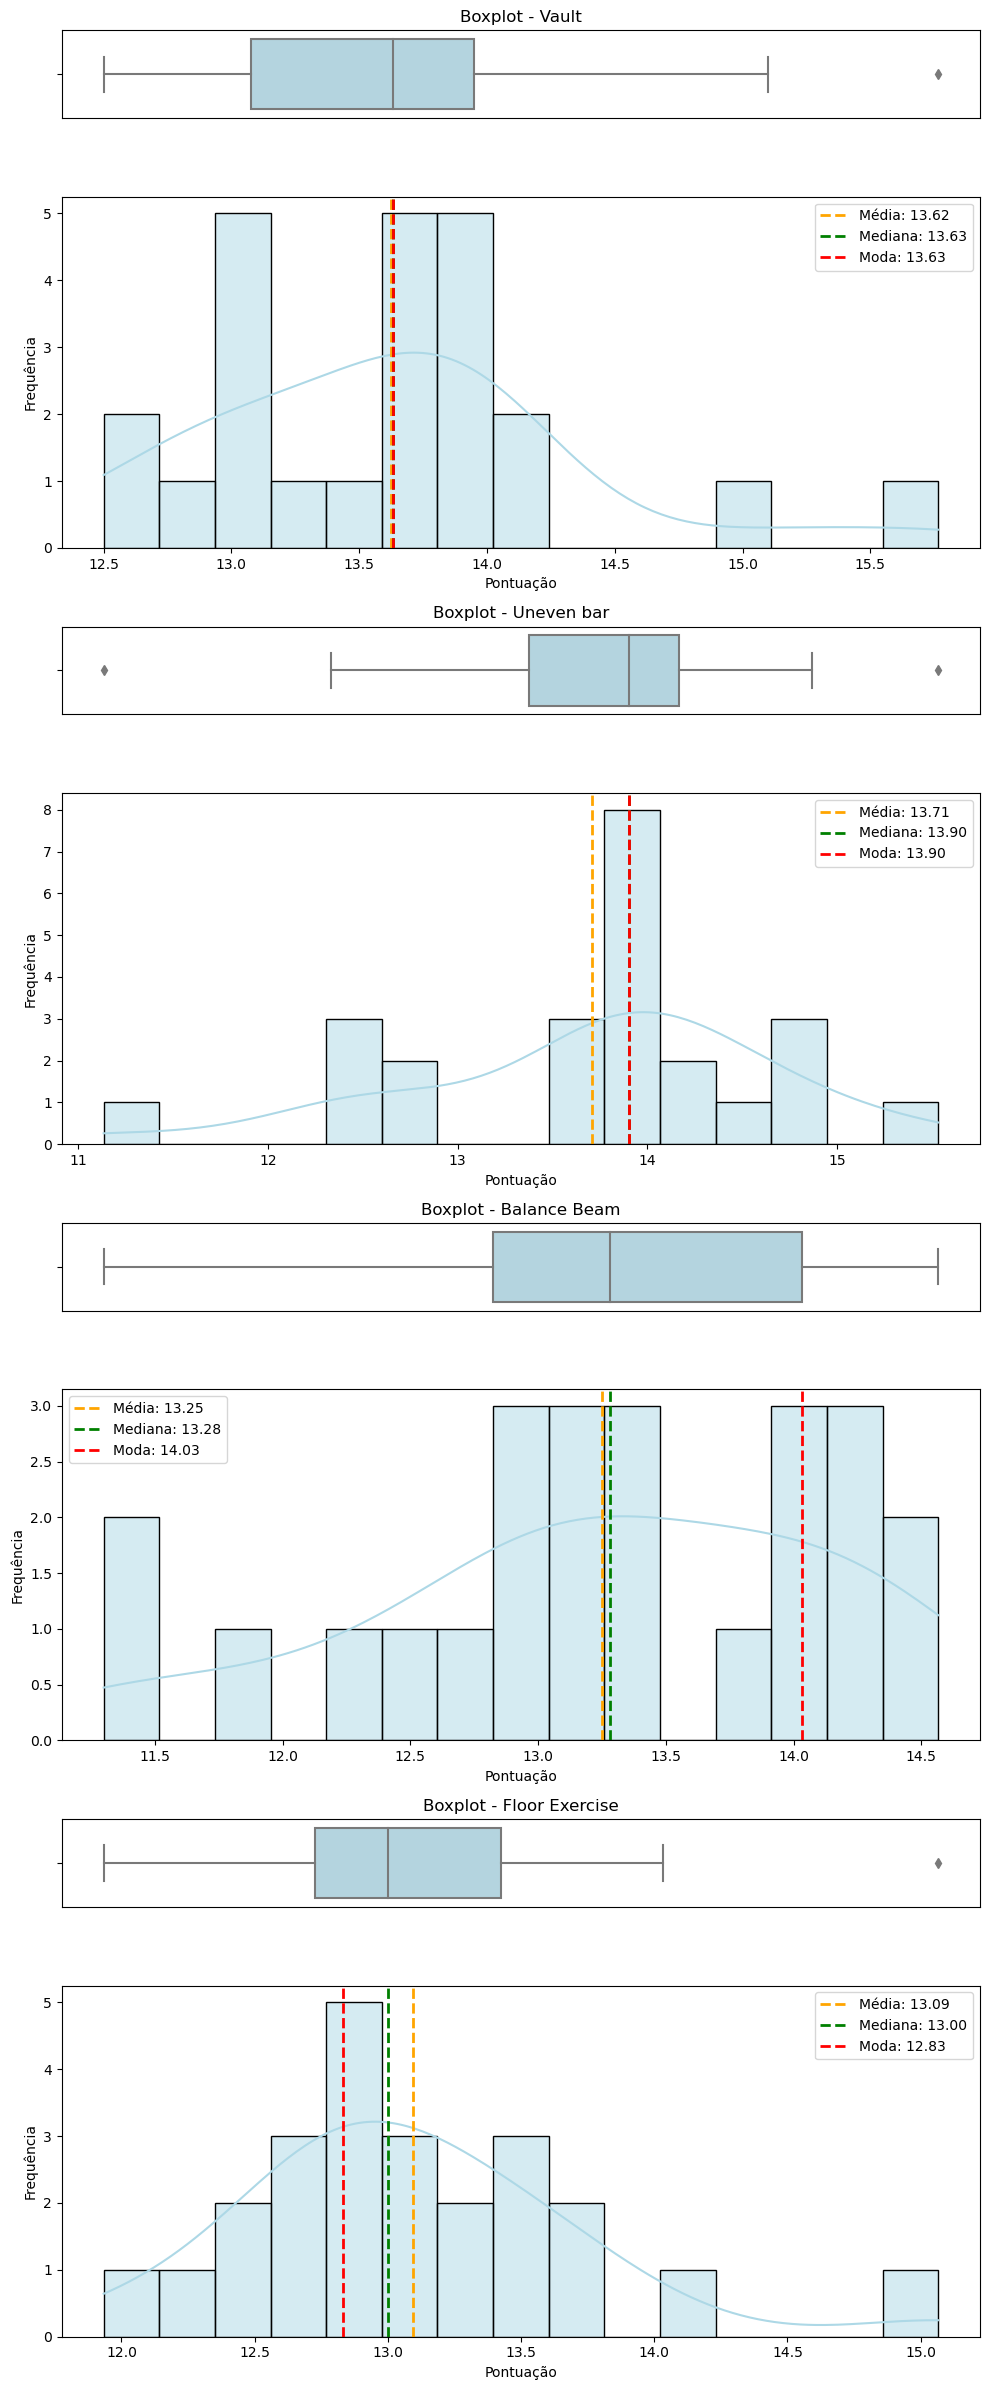

In [34]:
aparelhos = df_pandas['Aparelho'].unique()

# Configuração da figura com subplots para cada aparelho
fig = plt.figure(figsize=(10, 24))
grid = gridspec.GridSpec(len(aparelhos) * 2, 1, height_ratios=[1, 4] * len(aparelhos))

for i, aparelho in enumerate(aparelhos):
    # Dados de pontuação para o aparelho atual
    aparelho_scores = df_pandas[df_pandas['Aparelho'] == aparelho]['Pontuação']

    # Boxplot no subplot superior
    ax_box = plt.subplot(grid[2 * i])
    sns.boxplot(x=aparelho_scores, ax=ax_box, color="lightblue")
    ax_box.set(xlabel='', title=f'Boxplot - {aparelho}')
    ax_box.xaxis.set_visible(False)  # Esconder os labels do eixo x para o boxplot

    # Histograma no subplot inferior
    ax_hist = plt.subplot(grid[2 * i + 1])
    sns.histplot(aparelho_scores, bins=15, kde=True, color="lightblue", edgecolor='black', ax=ax_hist)
    mean_score = aparelho_scores.mean()
    median_score = aparelho_scores.median()
    mode_score = mode(aparelho_scores, keepdims=True)[0][0]

    # Adicionando linhas para média, mediana e moda
    ax_hist.axvline(mean_score, color='orange', linestyle='dashed', linewidth=2, label=f'Média: {mean_score:.2f}')
    ax_hist.axvline(median_score, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_score:.2f}')
    ax_hist.axvline(mode_score, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {mode_score:.2f}')

    ax_hist.set(xlabel='Pontuação', ylabel='Frequência')
    ax_hist.legend()

plt.tight_layout()
plt.show()

## Conclusões

### Resumo das Descobertas e Insights

- Analisando a dificuldade versus a pontuação, observa-se uma correlação positiva moderada, indicando que rotinas mais difíceis tendem a obter pontuações mais altas, embora a execução seja crítica para maximizar o potencial de pontuação.


- Atletas que minimizam penalidades conseguem melhorar suas classificações gerais de forma significativa, sugerindo que focar em precisão e execução pode ser tão crucial quanto aumentar a dificuldade das rotinas.

Pensando por aparelhos podemos dizer:
    
- Vault:
    - A análise das pontuações no salto revela que atletas que conseguem combinar a velocidade com um bom controle durante a execução tendem a obter pontuações significativamente mais altas. Rotinas de alta dificuldade, quando bem executadas, são especialmente recompensadas
- Uneven Bar:
    - No aparelho de barras assimétricas, a fluidez e a precisão nas transições entre as barras mostram uma forte correlação com as pontuações elevadas. Atletas que minimizam as paradas e mantêm a fluidez tendem a pontuar melhor
    - Dá para perceber que nas barras assimétricas, normalmente grandes atletas não tão especializadas nesse aparelho podem sofrer mais com suas execuções sendo um aparelho muito complicado em competições   
- Balance Beam:
    - A análise das performances na trave de equilíbrio indica que atletas que conseguem manter a estabilidade e minimizar oscilações durante a execução são consistentemente recompensados com pontuações mais altas.
- Floor Exercise:
    - No exercício de solo, a combinação de movimentos acrobáticos complexos com uma execução artística fluida tem mostrado uma correlação positiva com as pontuações. 

Em todos os aparelhos, a capacidade de equilibrar dificuldade com execução precisa é crucial. Atletas que conseguem minimizar penalidades enquanto mantêm ou aumentam a complexidade das rotinas tendem a se destacar na classificação geral.

### A disputa do século

- Rebeca Andrade VS Simone Biles:
    
    -Os gráficos sugerem que a disputa entre Simone Biles e Rebeca Andrade é mais acirrada do que nunca, com Andrade diminuindo a diferença em vários aparelhos. Embora Biles continue a ser uma das ginastas mais dominantes, Andrade está demonstrando que tem o potencial de desafiar e até superar algumas das performances de Biles, especialmente em aparelhos onde sua técnica e inovação são evidentes.